<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tiba0619/raw/main/rabbit.jpg"
urlretrieve(url, "rabbit.jpg")

('rabbit.jpg', <http.client.HTTPMessage at 0x7d5815831000>)

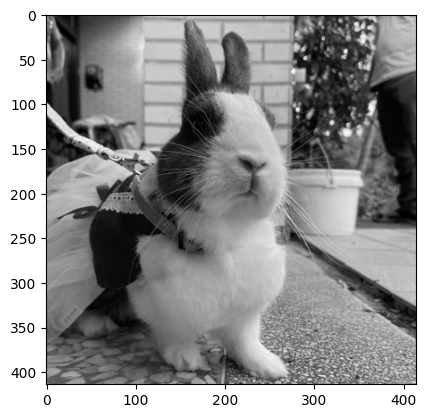

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("rabbit.jpg").convert("L").resize((414, 414))
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")

In [3]:
img_np.shape

(414, 414)

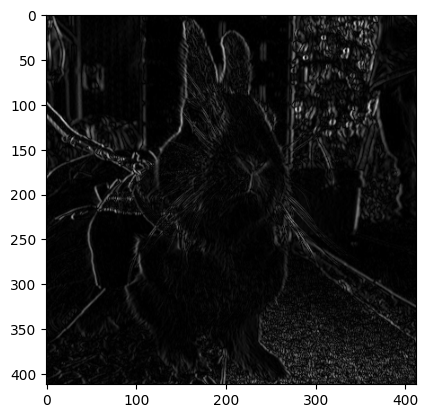

In [4]:
def gx(ci, cj, img):
    w = [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_x = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_x[i-1][j-1] = gx(i, j, img_np)
new_x_norm = (new_x - new_x.min()) / (new_x.max() - new_x.min())
plt.imshow(new_x_norm, cmap="gray")

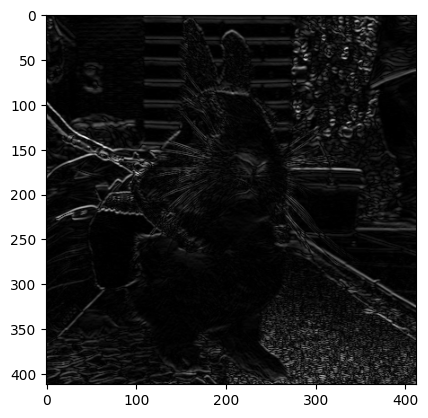

In [5]:
def gy(ci, cj, img):
    w = [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_y = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_y[i-1][j-1] = gy(i, j, img_np)
new_y_norm = (new_y - new_y.min()) / (new_y.max() - new_y.min())
plt.imshow(new_y_norm, cmap="gray")

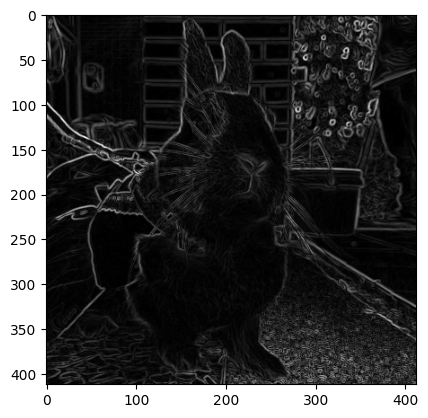

In [6]:
new_total = (new_x_norm ** 2 + new_y_norm ** 2) ** 0.5
plt.imshow(new_total, cmap="gray")

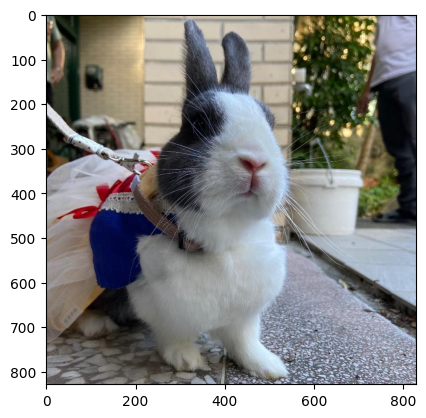

In [22]:
img = Image.open("rabbit.jpg").convert("RGB")
img_np = np.array(img)
plt.imshow(img_np)

In [ ]:
# demo: numpy 操作 對每個軸做出list操作
# plt.imshow(img_np[:414, :, :])
# plt.imshow(img_np[::-1, ::-1, :])
# plt.imshow(img_np[:, :, 1], cmap="Greens")
# plt.imshow(img_np[:, :, ::-1])

In [ ]:
# 畫圖: 0-255整數模式 0-1小數模式
# img_np = img_np / 255.0
img_new = img_np[:, :, 0] * 0.299 + img_np[:, :, 1] * 0.587 + img_np[:, :, 2] * 0.114
plt.imshow(img_new, cmap="gray")

In [25]:
img_new

array([[139.962, 141.962, 140.973, ..., 146.121, 145.893, 145.893],
       [139.962, 141.962, 140.973, ..., 151.121, 150.893, 150.893],
       [140.777, 142.777, 141.076, ..., 157.121, 157.121, 157.121],
       ...,
       [152.31 , 138.31 , 124.31 , ..., 207.219, 202.219, 207.92 ],
       [179.712, 165.712, 149.712, ..., 186.86 , 187.86 , 197.86 ],
       [173.712, 168.712, 165.712, ...,  80.099,  84.088,  98.088]])